- Name of activity: Python vs R
- Your name: Dima Mikhaylov
- Your UVA computing ID: agp7dp

In [51]:
# Import libraries
from google.colab import drive
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import warnings
warnings.filterwarnings("ignore")
import io

In [52]:
# Mount the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Upload the data file
uploaded = files.upload()

Saving mpg.csv to mpg.csv


In [4]:
# Check if the file is available 
!ls

drive  mpg.csv	sample_data


In [53]:
# Read and inspect the data frame 
df = pd.read_csv(io.StringIO(uploaded['mpg.csv'].decode('utf-8')))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


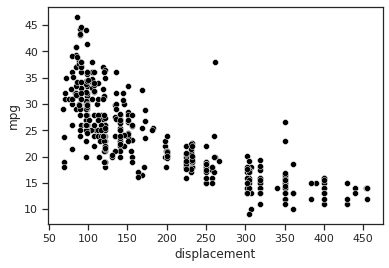

In [118]:
# What is the Car Performance w.r.t. Mileage over Displacement? (Python)
sns.scatterplot(y='mpg',x='displacement', data=df, color='black') 
plt.show()

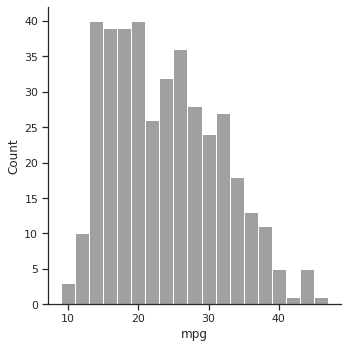

In [130]:
# What is the Histogram of Car Mileage? (Python)
sns.displot(x="mpg", binwidth=2, bins=50, data=df, color='grey')
plt.show()

In [56]:
# Python compared to R for Setup (Comments):
# Python reads mpg.csv file from the mounted drive, but R has mpg built in DataFrame

In [57]:
# Python compared to R for Car Mileage Plots (Comments)
# Both show negative relationship between engine size (displ) and fuel efficiency (hwy), i.e. fitted regression line has negatove slope. 
# Histogram of mpg is slightly skewed but tends to be bell shaped.

In [58]:
# Installing package to interpret R code in Python kernel
#!pip install rpy2

In [59]:
# Load library installed above
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [75]:
# Import ggplot2 -- need to include %%R magic every time one runs R code in Python kernel
%%R # this is needed to read R code 
library(ggplot2)

In [61]:
# mpg is R Built-in dataset
%%R
df <- ggplot2::mpg
head(df)

# A tibble: 6 × 11
  manufacturer model displ  year   cyl trans      drv     cty   hwy fl    class 
  <chr>        <chr> <dbl> <int> <int> <chr>      <chr> <int> <int> <chr> <chr> 
1 audi         a4      1.8  1999     4 auto(l5)   f        18    29 p     compa…
2 audi         a4      1.8  1999     4 manual(m5) f        21    29 p     compa…
3 audi         a4      2    2008     4 manual(m6) f        20    31 p     compa…
4 audi         a4      2    2008     4 auto(av)   f        21    30 p     compa…
5 audi         a4      2.8  1999     6 auto(l5)   f        16    26 p     compa…
6 audi         a4      2.8  1999     6 manual(m5) f        18    26 p     compa…


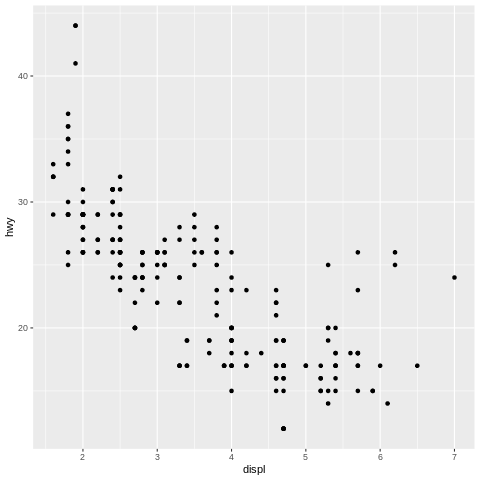

In [97]:
# Plot mpg, run this code to put displ on the x-axis and hwy on the y-axis
%%R
ggplot(data=mpg) + 
geom_point(mapping = aes(x=displ,y=hwy)) 
# Conclusion: cars with big engines use more fuel, so they have smaller mpg.
# This confirm the hypothesis about fuel efficiency and engine size.

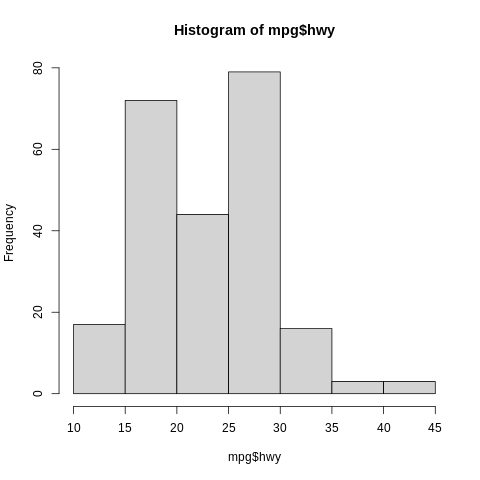

In [99]:
# Plt mpg histogram
%%R
hist(mpg$hwy)

In [119]:
# To reproduce the charts exactly like in Python, one needs to use the same data file:
%%R
r_data <- read.csv(file = 'mpg.csv')
head(r_data)

  mpg cylinders displacement horsepower weight acceleration model_year origin
1  18         8          307        130   3504         12.0         70      1
2  15         8          350        165   3693         11.5         70      1
3  18         8          318        150   3436         11.0         70      1
4  16         8          304        150   3433         12.0         70      1
5  17         8          302        140   3449         10.5         70      1
6  15         8          429        198   4341         10.0         70      1
                       name
1 chevrolet chevelle malibu
2         buick skylark 320
3        plymouth satellite
4             amc rebel sst
5               ford torino
6          ford galaxie 500


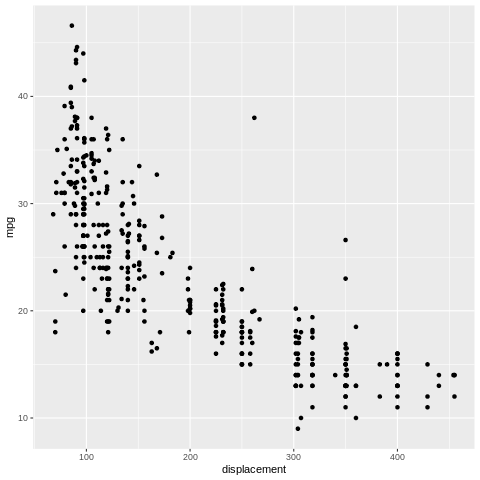

In [132]:
# Same scatter
%%R
ggplot(data=r_data) + 
geom_point(mapping = aes(x=displacement,y=mpg)) 

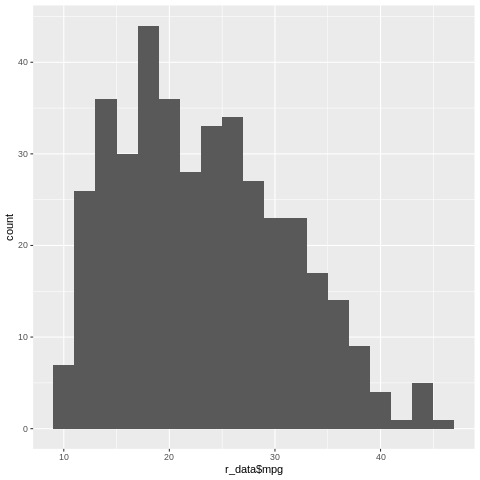

In [133]:
# Same histogram 
%%R
ggplot(data=r_data, aes(r_data$mpg)) + 
  geom_histogram(binwidth=2, bins=50)